In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
def cost_function(theta, nX, y):
    m = np.shape(nX)[0]
    theta = theta.reshape(2,1)
    J = (sum(np.power((np.dot(nX, theta) - y.reshape((m,1))), 2)) / (2 * m))[0]
    g = (np.dot(nX.T, np.dot(nX, theta) - y.reshape((m,1))) / m).reshape(2)
    return J, g

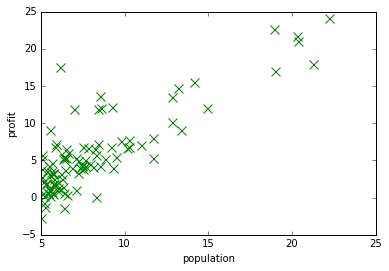

In [3]:
#read and plot data
data = np.loadtxt('ex1data1.txt')
d = data[:,0]
y = data[:,1]

plt.plot(d, y, 'gx', mew=1, ms=9)
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

In [4]:
#get number of examples and add column with ones
m = np.shape(d)[0]
X = np.array([np.ones((m)), d.T]).T

#initialize variables
alpha = 0.01
initial_theta = np.array(np.ones((X.shape[1])))

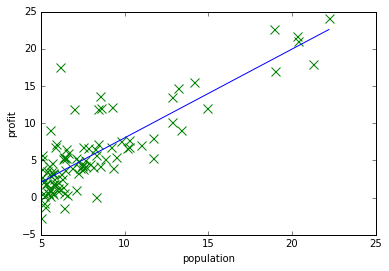

In [14]:
#compute theta and plot result
res = minimize(cost_function, initial_theta, method='BFGS', jac=True, args=(X, y)).x.reshape((2,1))

b_dots = np.array([[1, np.min(d)], [1, np.max(d)]])
y_ = np.dot(b_dots, res)

plt.plot(d, y, 'gx', mew=1, ms=9)
plt.plot(b_dots.T[1], y_.T[0])
plt.xlabel('population')
plt.ylabel('profit')
plt.show()